In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('../data/supra.jpeg')
H, W, C = img.shape

In [13]:
# Filter
K_size = 3

K = np.diag([1] * K_size).astype(np.float)
K /= K_size

In [15]:
# Zero Padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad * 2, C), dtype=np.float)
out[pad: pad+H, pad: pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * tmp[y: y+K_size, x: x+K_size, c])
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

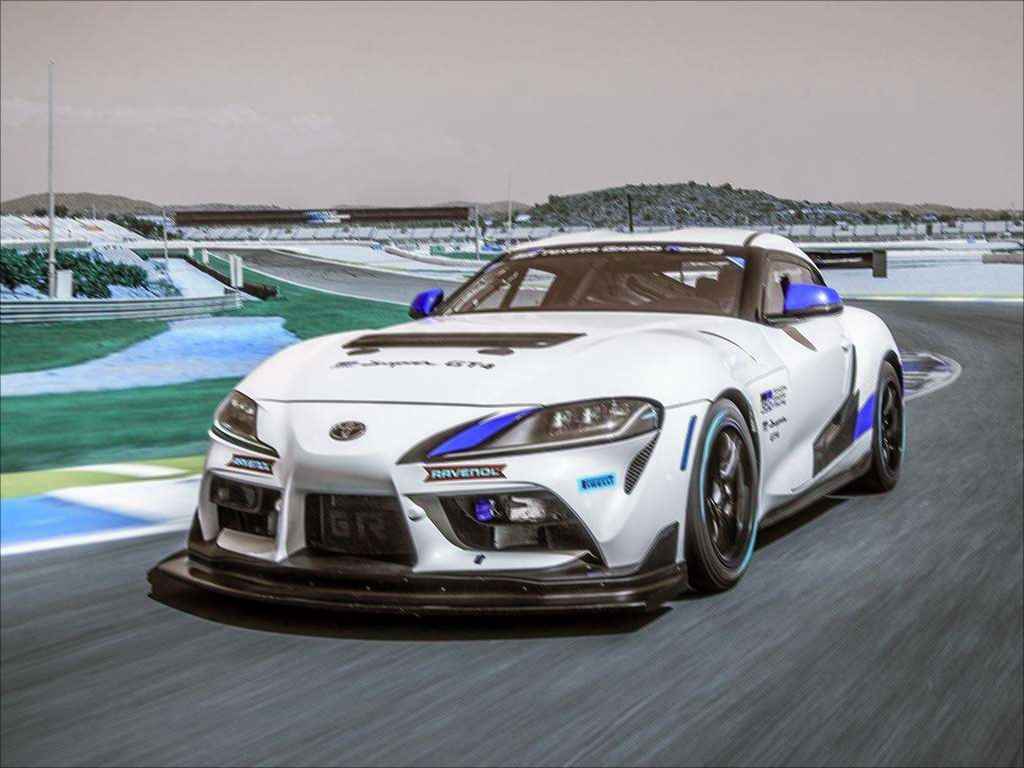

In [16]:
Image.fromarray(out)

In [17]:
cv2.imwrite("./out12_Motion_Filter.jpg", out)

True